In [676]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [677]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

In [678]:
X_train.shape

(60000, 28, 28)

In [679]:
y_train.shape

(60000,)

In [680]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

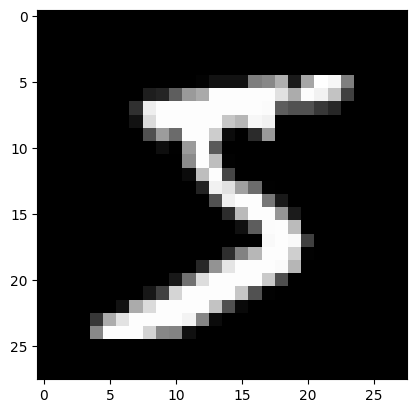

In [681]:
plt.imshow(X_train[0],cmap = 'grey')
plt.show()

In [682]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [683]:
y_train[0]

np.uint8(5)

In [684]:
y_train = np.eye(10)[y_train] #np.eye creates identity matrix of 10x10
y_test = np.eye(10)[y_test]
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [685]:
X_train = X_train.reshape(-1,784)/255.0
X_test = X_test.reshape(-1,784)/255.0
print(X_train[0],X_train[0].shape)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [686]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [687]:
def parameters():
    W1 = np.random.rand(10,784) - 0.5 #Outputs a matrix containing values between -0.5 and 0.5 
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

In [ ]:
def ReLu(Z):
    return np.maximum(0,Z)

def softmax(Z):
    Z = np.exp(Z - np.max(Z, axis=0, keepdims=True)) #Axis = 0 Sum per column
    return Z / np.sum(Z, axis=0, keepdims=True)

def derv(Z):
    return Z > 0 #Returns 1 if True else 0

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def backward_prop(Z1,A1,Z2,A2,W2,X,Y):
    m = Y.shape[1]
    dZ2 = A2 - Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2,axis = 1,keepdims=True) #Axis = 1 Sum per row
    dZ1 = W2.T.dot(dZ2) * derv(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1,axis = 1,keepdims=True) 
    return dW1,db1,dW2,db2

def update(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

In [ ]:
def predictions(A2):
    return np.argmax(A2,axis = 0)

def accuracy(predictions,Y):
    label = np.argmax(Y,axis = 0) #Returns index of highest per column
    return np.mean(predictions == label)

In [690]:
def descent(X,Y,iterations,alpha):
    W1,b1,W2,b2 = parameters()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2  = backward_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2  = update(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i % 10 == 0:
            print(f"Iteration: {i}, Accuracy: {accuracy(predictions(A2),Y)}")
    return W1,b1,W2,b2

In [691]:
batch = 1000
X = X_train[:,:batch]
Y = y_train[:,:batch]
alpha = 0.1
iterations = 1000

W1, b1, W2, b2 = descent(X,Y,iterations,alpha)

Iteration: 0, Accuracy: 0.124
Iteration: 10, Accuracy: 0.219
Iteration: 20, Accuracy: 0.267
Iteration: 30, Accuracy: 0.324
Iteration: 40, Accuracy: 0.36
Iteration: 50, Accuracy: 0.398
Iteration: 60, Accuracy: 0.451
Iteration: 70, Accuracy: 0.492
Iteration: 80, Accuracy: 0.525
Iteration: 90, Accuracy: 0.573
Iteration: 100, Accuracy: 0.605
Iteration: 110, Accuracy: 0.637
Iteration: 120, Accuracy: 0.667
Iteration: 130, Accuracy: 0.697
Iteration: 140, Accuracy: 0.722
Iteration: 150, Accuracy: 0.744
Iteration: 160, Accuracy: 0.764
Iteration: 170, Accuracy: 0.788
Iteration: 180, Accuracy: 0.797
Iteration: 190, Accuracy: 0.804
Iteration: 200, Accuracy: 0.819
Iteration: 210, Accuracy: 0.827
Iteration: 220, Accuracy: 0.834
Iteration: 230, Accuracy: 0.838
Iteration: 240, Accuracy: 0.842
Iteration: 250, Accuracy: 0.845
Iteration: 260, Accuracy: 0.851
Iteration: 270, Accuracy: 0.853
Iteration: 280, Accuracy: 0.862
Iteration: 290, Accuracy: 0.865
Iteration: 300, Accuracy: 0.868
Iteration: 310, Accu

In [692]:
Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X_test)
pred = predictions(A2)
acc = accuracy(pred,y_test)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.8119
